### Sandbox for Interactive Plots

Goal:  link a discrete slider to a line plot, where the position of the slider updates the plot to show a vertical line at the x coordinate determined by the slider and a piece of descriptive text at the y coordinate.

In [2]:
import param
import panel as pn
pn.extension()

In [3]:
#from bokeh.plotting import figure, show
#from bokeh.models import Label

import matplotlib.pyplot as plt
import random

In [4]:
budgets = list(range(0,5000000,500000))
benefits = [0]

for i in range(len(budgets) - 1):
    benefits.append(benefits[i] + random.randint(0, 5))

See:
* set_tick_params (color, size, location, ...)

In [5]:
dollar_format = {
    'thou':  (1000, 'K'),
    'mil':   (1000000, 'M'),
}

def format_budget_amount(n):
    divisor, suffix = dollar_format['mil'] if n >= 1000000 else dollar_format['thou']
    s = '${:}'.format(n/divisor)
    if s.endswith('.0'):
        s = s[:-2]
    return s+suffix

In [6]:
def tick_fmt(n, x):
    return format_budget_amount(n)

In [7]:
[tick_fmt(n,_) for n in budgets]

['$0K',
 '$500K',
 '$1M',
 '$1.5M',
 '$2M',
 '$2.5M',
 '$3M',
 '$3.5M',
 '$4M',
 '$4.5M']

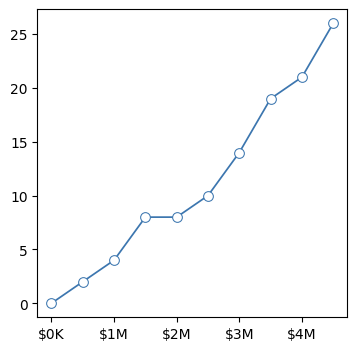

In [8]:
LC = '#3c76af'

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(budgets, benefits, color=LC, linewidth=1.25)
ax.plot(budgets, benefits, 'o', markerfacecolor='white', markeredgecolor=LC, markersize=7, markeredgewidth=0.75)
ax.xaxis.set_major_formatter(tick_fmt)


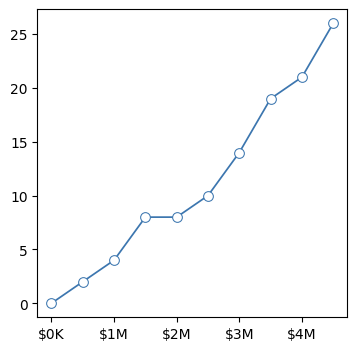

In [9]:
fig

In [10]:
fig.savefig('text.pdf')

In [11]:
fig.savefig('test.png')

In [12]:
fig.savefig('test.jpeg')